<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(0)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_0'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,80.925571,74.774609,0.056505,165.756684,165.685881,0.070804
1,0.0,1.0,88.038251,80.740424,0.827552,179.606228,178.756706,0.849522
2,0.0,2.0,62.715808,58.016045,0.349726,131.081579,130.733465,0.348113
3,0.0,3.0,58.371317,64.200132,-0.237275,132.334174,132.602429,-0.268255
4,0.0,4.0,69.300871,55.136165,0.060996,134.498032,134.410443,0.087589
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,81.601547,82.801360,-0.946988,173.455919,174.364051,-0.908132
249996,999.0,246.0,80.101575,20.682938,0.914881,111.699395,110.878255,0.821140
249997,999.0,247.0,29.939157,84.163878,-0.322061,123.780974,124.089278,-0.308304
249998,999.0,248.0,66.522999,34.058713,-0.036033,110.545679,110.654433,-0.108754


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    80.925571  74.774609  0.056505  165.756684  165.685881  0.070804
      1.0    88.038251  80.740424  0.827552  179.606228  178.756706  0.849522
      2.0    62.715808  58.016045  0.349726  131.081579  130.733465  0.348113
      3.0    58.371317  64.200132 -0.237275  132.334174  132.602429 -0.268255
      4.0    69.300871  55.136165  0.060996  134.498032  134.410443  0.087589
...                ...        ...       ...         ...         ...       ...
999.0 245.0  81.601547  82.801360 -0.946988  173.455919  174.364051 -0.908132
      246.0  80.101575  20.682938  0.914881  111.699395  110.878255  0.821140
      247.0  29.939157  84.163878 -0.322061  123.780974  124.089278 -0.308304
      248.0  66.522999  34.058713 -0.036033  110.545679  110.654433 -0.108754
      249.0  98.799425  55.844177 -0.006735  164.636867  164.652619 -0.015752

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    80.925571  74.774609  0.056505  165.756684  165.685881  0.070804
      1.0    88.038251  80.740424  0.827552  179.606228  178.756706  0.849522
      2.0    62.715808  58.016045  0.349726  131.081579  130.733465  0.348113
      3.0    58.371317  64.200132 -0.237275  132.334174  132.602429 -0.268255
      4.0    69.300871  55.136165  0.060996  134.498032  134.410443  0.087589
...                ...        ...       ...         ...         ...       ...
999.0 245.0  81.601547  82.801360 -0.946988  173.455919  174.364051 -0.908132
      246.0  80.101575  20.682938  0.914881  111.699395  110.878255  0.821140
      247.0  29.939157  84.163878 -0.322061  123.780974  124.089278 -0.308304
      248.0  66.522999  34.058713 -0.036033  110.545679  110.654433 -0.108754
      249.0  98.799425  55.844177 -0.006735  164.636867  164.652619 -0.015752

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,80.925571,74.774609,0.056505,165.756684,165.685881,0.070804
1,0.0,1.0,88.038251,80.740424,0.827552,179.606228,178.756706,0.849522
2,0.0,2.0,62.715808,58.016045,0.349726,131.081579,130.733465,0.348113
3,0.0,3.0,58.371317,64.200132,-0.237275,132.334174,132.602429,-0.268255
4,0.0,4.0,69.300871,55.136165,0.060996,134.498032,134.410443,0.087589
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,81.601547,82.801360,-0.946988,173.455919,174.364051,-0.908132
249996,999.0,246.0,80.101575,20.682938,0.914881,111.699395,110.878255,0.821140
249997,999.0,247.0,29.939157,84.163878,-0.322061,123.780974,124.089278,-0.308304
249998,999.0,248.0,66.522999,34.058713,-0.036033,110.545679,110.654433,-0.108754


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    80.925571  74.774609  0.056505  165.756684  165.685881  0.070804
      1.0    88.038251  80.740424  0.827552  179.606228  178.756706  0.849522
      2.0    62.715808  58.016045  0.349726  131.081579  130.733465  0.348113
      3.0    58.371317  64.200132 -0.237275  132.334174  132.602429 -0.268255
      4.0    69.300871  55.136165  0.060996  134.498032  134.410443  0.087589
...                ...        ...       ...         ...         ...       ...
999.0 245.0  81.601547  82.801360 -0.946988  173.455919  174.364051 -0.908132
      246.0  80.101575  20.682938  0.914881  111.699395  110.878255  0.821140
      247.0  29.939157  84.163878 -0.322061  123.780974  124.089278 -0.308304
      248.0  66.522999  34.058713 -0.036033  110.545679  110.654433 -0.108754
      249.0  98.799425  55.844177 -0.006735  164.636867  164.652619 -0.015752

[250000 rows x 6 columns]

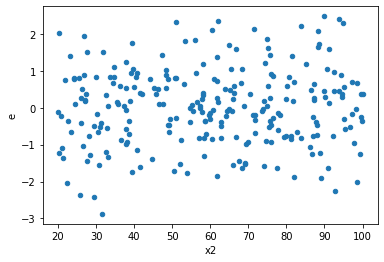

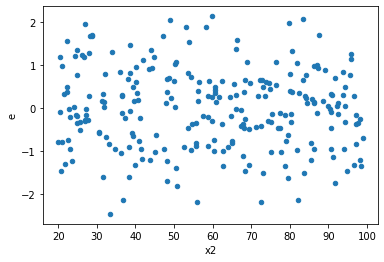

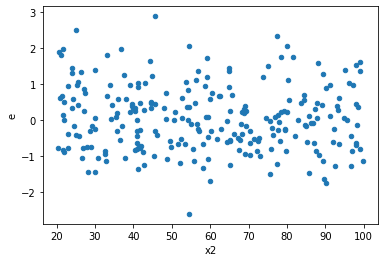

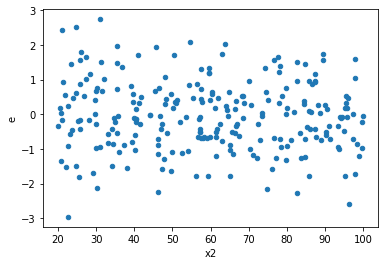

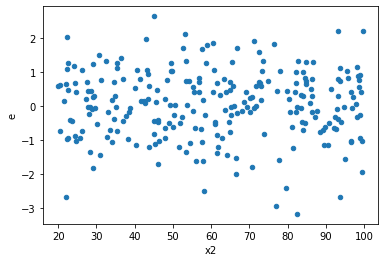

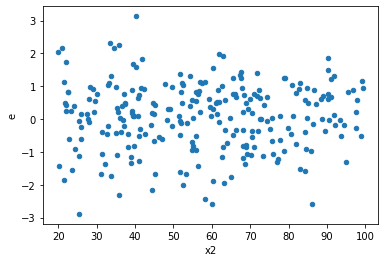

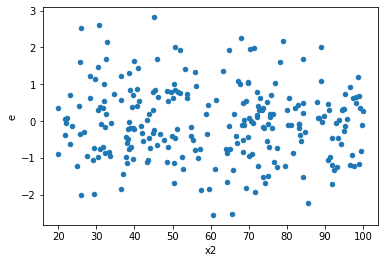

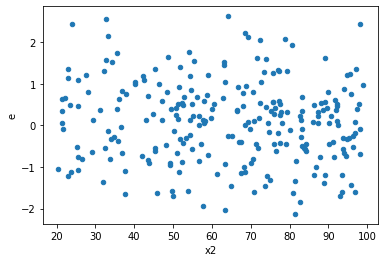

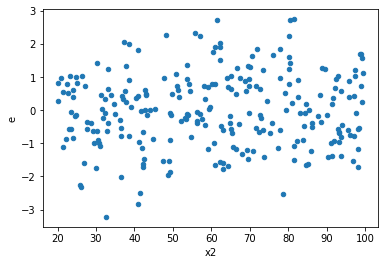

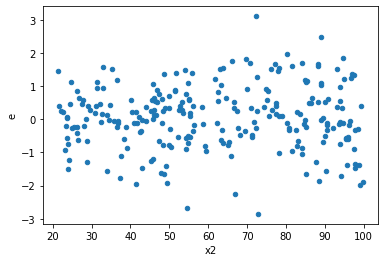

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,131.0,115.0,111.42314202698456,131.06263941300153,0.8505583360838517,1.139675125330448,1.339914121091036,0.10871343729435212,0.9456432813528239,0.05435671864717606,Reject001=1 : Homoscedasticity
7.0,141.0,105.0,125.86317156464203,104.86191905262416,0.8926466068414328,0.9986849433583254,1.1187909478445246,0.5460101815921607,0.7269949092039196,0.2730050907960804,Reject001=1 : Homoscedasticity
8.0,129.0,117.0,151.0411870932216,151.39783753585561,1.1708619154513302,1.2939986114175694,1.1051675644593615,0.5828531178859726,0.7085734410570137,0.2914265589429863,Reject001=1 : Homoscedasticity
9.0,136.0,110.0,93.68621960229487,127.7635501783106,0.6888692617815799,1.1614868198028236,1.6860772925169316,0.0047010650693053435,0.9976494674653473,0.0023505325346526718,Reject001=0 : Heteroscedasticity
10.0,128.0,118.0,100.0224184096852,131.14523956505838,0.7814251438256656,1.111400335297105,1.4222735780627198,0.05289731679857823,0.9735513416007109,0.026448658399289116,Reject001=1 : Homoscedasticity
12.0,104.0,142.0,103.93656780986953,150.7152645534204,0.9993900750948993,1.0613751024888762,1.062022856678951,0.734683000732804,0.632658499633598,0.367341500366402,Reject001=1 : Homoscedasticity
15.0,142.0,104.0,114.03502531071815,93.50618953645375,0.8030635585261842,0.8990979763120552,1.1195850773780813,0.5443570132212292,0.7278214933893854,0.2721785066106146,Reject001=1 : Homoscedasticity
17.0,119.0,127.0,105.39089041660215,168.35484907519344,0.8856377345932953,1.325628732875539,1.4968069686916596,0.02573531881504776,0.9871323405924761,0.01286765940752388,Reject001=1 : Homoscedasticity
18.0,139.0,107.0,129.7971690087551,106.9207907230256,0.9337925827967993,0.9992597263834169,1.0701088708485316,0.7163665168978848,0.6418167415510576,0.3581832584489424,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,118.0,128.0,130.35896420090555,134.32324091462107,1.1047369847534367,1.049400319645477,0.9499096473896815,0.7782613391974488,Reject001=1 : Homoscedasticity
1.0,134.0,112.0,125.2059930867328,88.01373760542197,0.934373082736812,0.7858369429055533,0.8410312298421622,0.33629399239066976,Reject001=1 : Homoscedasticity
2.0,147.0,99.0,129.21220552112558,67.73102381330371,0.8789945953818067,0.6841517556899365,0.778334428089132,0.16712638322885412,Reject001=1 : Homoscedasticity
3.0,131.0,115.0,111.42314202698456,131.06263941300153,0.8505583360838517,1.139675125330448,1.339914121091036,0.10871343729435212,Reject001=1 : Homoscedasticity
4.0,134.0,112.0,140.82552429630115,104.6790600090681,1.0509367484798593,0.9346344643666794,0.8893346490343907,0.5138961166948233,Reject001=1 : Homoscedasticity
5.0,121.0,125.0,139.15812202370213,113.53819960301618,1.1500671241628275,0.9083055968241295,0.7897848549364591,0.19274280728109255,Reject001=1 : Homoscedasticity
6.0,118.0,128.0,123.69118665723951,114.48153078722949,1.048230395400335,0.8943869592752304,0.8532350933533563,0.38223557666116165,Reject001=1 : Homoscedasticity
7.0,141.0,105.0,125.86317156464203,104.86191905262416,0.8926466068414328,0.9986849433583254,1.1187909478445246,0.5460101815921607,Reject001=1 : Homoscedasticity
8.0,129.0,117.0,151.0411870932216,151.39783753585561,1.1708619154513302,1.2939986114175694,1.1051675644593615,0.5828531178859726,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      989
Reject001=0 : Heteroscedasticity     11
Name: Result_test, dtype: int64